In [2]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from datetime import datetime, timedelta



Fetching data for ^NSEI from 2022-08-12 to 2025-08-11...


/var/folders/b4/kngm427s69dd17dcrjgxvhf80000gn/T/ipykernel_23860/3004457811.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


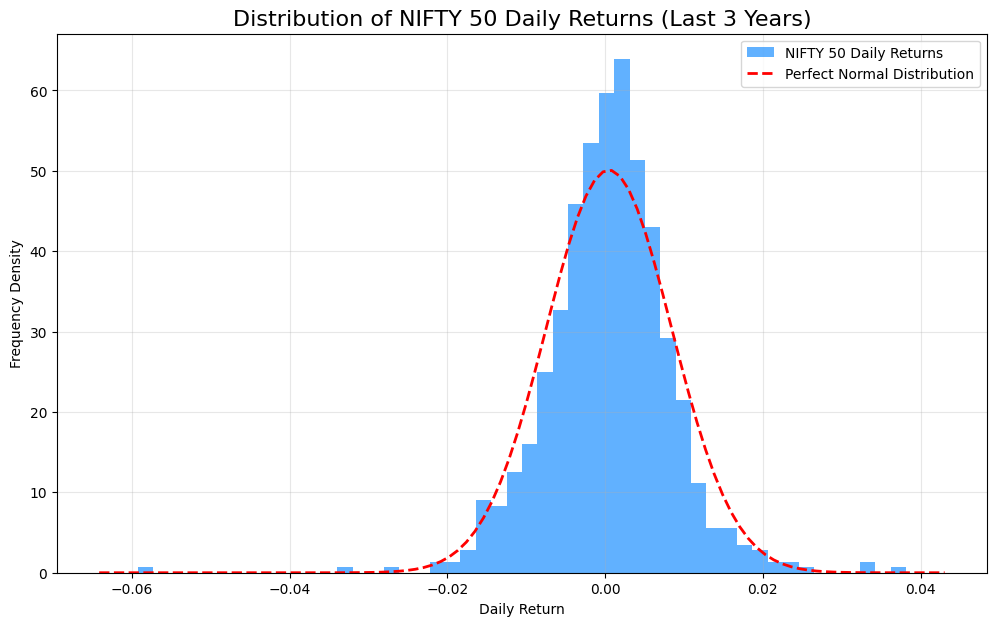


--- Statistical Normality Tests ---

Shapiro-Wilk Test:
  - P-value: 0.0000

Jarque-Bera Test:
  - P-value: 0.0000

--- Conclusion ---
Both tests confirm that the daily returns are NOT normally distributed (p < 0.05).

Reasons for non-normality:
1. Skewness: -0.3756. The distribution is not perfectly symmetrical.
2. Kurtosis (Fat Tails): 5.7051. The distribution has an excess kurtosis greater than 0,
   meaning extreme gains and losses occur more frequently than predicted by a normal distribution.


In [3]:
# 1. ---Fetching the data----
# Set the ticker for NIFTY 50 and define the 3-year date range.
ticker = "^NSEI"
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)

print(f"Fetching data for {ticker} from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}...")

# Download the data from Yahoo Finance.
try:
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        raise ValueError(f"No data found for ticker {ticker}. It might be delisted or the ticker is incorrect.")
    
# 2. ---calculating the return

    # We use 'Adj Close' as it accounts for dividends and stock splits.
    # .pct_change() calculates the percentage change from the previous day.
    # .dropna() removes the first row which is NaN (no return on the first day).


    # data['Daily_Return'] = data['Adj Close'].pct_change()
    # daily_returns = data['Daily_Return'].dropna()

    #error

    #The error 'Adj Close' occurs because the yfinance library recently changed its default behavior. 
    # It now automatically provides an adjusted price in the 'Close' column and no longer includes a separate 'Adj Close' column.

#The fix is to simply use 'Close' instead of 'Adj Close' to calculate the daily returns.

    # Use 'Close' instead of 'Adj Close'.
    data['Daily_Return'] = data['Close'].pct_change()
    daily_returns = data['Daily_Return'].dropna()


    # --- Step 3: Plot the Histogram ---
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Plot the histogram of our returns data.
    ax.hist(daily_returns, bins=50, density=True, alpha=0.7, color='dodgerblue', label='NIFTY 50 Daily Returns')
    
    # Overlay a perfect normal distribution curve for visual comparison.
    mu, std = stats.norm.fit(daily_returns)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    ax.plot(x, p, 'r--', linewidth=2, label='Perfect Normal Distribution')
    
    ax.set_title('Distribution of NIFTY 50 Daily Returns (Last 3 Years)', fontsize=16)
    ax.set_xlabel('Daily Return')
    ax.set_ylabel('Frequency Density')
    ax.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # --- Step 4: Apply Normality Tests ---
    print("\n--- Statistical Normality Tests ---")
    
    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = stats.shapiro(daily_returns)
    print(f"\nShapiro-Wilk Test:")
    print(f"  - P-value: {shapiro_p:.4f}")
    
    # Jarque-Bera Test
    jb_stat, jb_p = stats.jarque_bera(daily_returns)
    print(f"\nJarque-Bera Test:")
    print(f"  - P-value: {jb_p:.4f}")

    # --- Step 5: Conclude the Results ---
    print("\n--- Conclusion ---")
    # A p-value less than 0.05 is the standard threshold to reject the null hypothesis.
    if shapiro_p < 0.05 and jb_p < 0.05:
        print("Both tests confirm that the daily returns are NOT normally distributed (p < 0.05).")
        
        # Explain why, based on skewness and kurtosis.
        skew = daily_returns.skew()
        kurt = daily_returns.kurt() # This is excess kurtosis.
        
        print("\nReasons for non-normality:")
        print(f"1. Skewness: {skew:.4f}. The distribution is not perfectly symmetrical.")
        print(f"2. Kurtosis (Fat Tails): {kurt:.4f}. The distribution has an excess kurtosis greater than 0,")
        print("   meaning extreme gains and losses occur more frequently than predicted by a normal distribution.")
    else:
        print("The data appears to be normally distributed.")

except Exception as e:
    print(f"An error occurred: {e}")